# Importing libraries
PIL library used for importing an image to an array and using it as a mask
Wordcloud library used to

In [98]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
#import scipy ???
driver = 'mysql+pymysql:'
user = 'root'
password = 'secret'
ip = '127.0.0.1'
database = 'project'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [2]:
frontend_json = json.load(open('front_end_developer.json'))
backend_json = json.load(open('back_end_developer.json'))
wd_json = json.load(open('WD.json'))

In [21]:
def clean_data(json):
    df = pd.DataFrame()
    ids = []
    citys = []
    experience = []
    skills = []
    min_salary = []
    max_salary = []
    salary_period = []
    
    for i in range(len(json['offers'])):
        ids.append(json['offers'][i]['id'])
        citys.append(json['offers'][i]['city'])
        experience.append(json['offers'][i]['experienceMin']['value'])
        skills.append(json['offers'][i]['requirementMin'])
        min_salary.append(json['offers'][i]['salaryMin']['value'])
        max_salary.append(json['offers'][i]['salaryMax']['value'])
        salary_period.append(json['offers'][i]['salaryPeriod']['value'])
        
    df['id'] = ids
    df['city'] = citys
    df['min_experience'] = experience
    df['skills'] = skills
    df['min_salary'] = min_salary
    df['max_salary'] = max_salary
    df['salary_period'] = salary_period
    df.replace("Sant Cugat Del Vall??s","Sant Cugat Del Valles", inplace = True)
    df.min_salary = df.min_salary.apply(lambda x: x.replace('.',''))
    df.min_salary = df.min_salary.apply(lambda x: x.replace(' €',''))
    df.max_salary = df.max_salary.apply(lambda x: x.replace('.',''))
    df.max_salary = df.max_salary.apply(lambda x: x.replace(' €',''))
    df.min_salary = pd.to_numeric(df.min_salary)
    df.max_salary = pd.to_numeric(df.max_salary)
    return df

In [22]:
frontend_2 = clean_data(frontend_json)
backend_2 = clean_data(backend_json)
wd_2 = clean_data(wd_json)

In [23]:
frontend_2.shape

(41, 7)

In [24]:
backend_2.shape

(9, 7)

In [25]:
wd_2.shape

(35, 7)

In [26]:
bf_df = pd.concat([frontend_2, backend_2, wd_2])

In [27]:
bf_df.reset_index(drop = True, inplace = True)

In [30]:
bf_df.groupby('min_experience').count()

,id,city,skills,min_salary,max_salary,salary_period
min_experience,,,,,,
Al menos 1 año,23,23,23,9,9,23
Al menos 2 años,26,26,26,10,10,26
Al menos 3 años,14,14,14,9,9,14
Al menos 4 años,6,6,6,4,4,6
Más de 5 años,9,9,9,4,4,9
No Requerida,7,7,7,2,2,7


In [42]:
text = " ".join(skill for skill in bf_df.skills)
print (f"There are {len(text)} words in the combination of all review.")

There are 20415 words in the combination of all review.


In [129]:
stopwords = set(STOPWORDS)
stopwords.update(["de","que","experience","years","Se","valorará","skills","capacidad","UK","el","como","level", "Experiencia","mínimo","Good","años","good","trabajo", "con","por", "en", "las", "desarrollo", "Conocimiento", "Conocimientos", "la","etc", "para", "similar", "menos", "año", "al", "knowledge", "proyecto", "framework", "frameworks"])

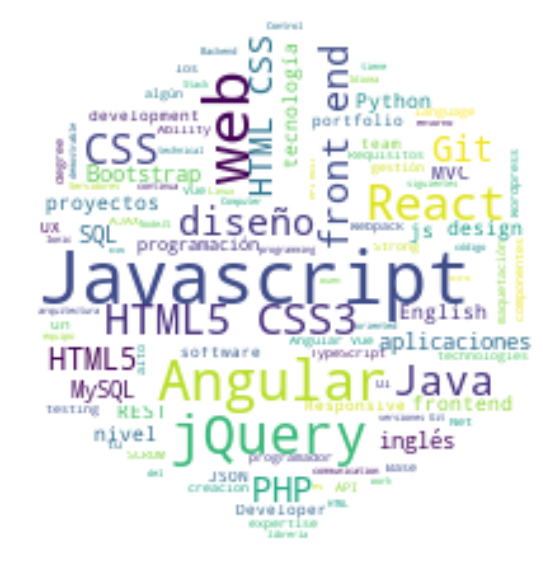

In [128]:
iron_mask = np.array(Image.open("ironhack_logo.png"))
wc = WordCloud(background_color="white",width=1000, height=1000, max_words=1000, mask=iron_mask, stopwords=stopwords)
wc.generate(text)
#wc.to_file("skills.png")
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()